In [1]:
!pip install requests

In [13]:
!pip install matplotlib

In [30]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import time
import flask
import math

#### coingecko에서는 특별히 API키를 발급받지 않아도 일부 공개된 데이터를 불러오는 것이 가능하다

In [11]:
url = "https://api.coingecko.com/api/v3/simple/price"

# API 요청
params = {
    'ids' : 'bitcoin', # 암호화폐 ID
    'vs_currencies' : 'krw' # 가격을 표시할 통화
}

response = requests.get(url, params = params)

data = response.json()

print(f"현재 비트코인 가격은 krw : {data['bitcoin']['krw']}원")

현재 비트코인 가격은 krw : 92211961원


In [12]:
import requests

# API 엔드포인트 URL
url = "https://api.coingecko.com/api/v3/simple/price"

# API 요청 파라미터
params = {
    'ids': 'bitcoin,ethereum,litecoin',  # 조회할 암호화폐 IDs (쉼표로 구분)
    'vs_currencies': 'usd'               # 가격을 표시할 통화
}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 JSON 데이터 파싱
data = response.json()

# 각 암호화폐 가격 출력
for coin, info in data.items():
    print(f"{coin.capitalize()} price in USD: {info['usd']}")

Bitcoin price in USD: 66399
Ethereum price in USD: 3328.19
Litecoin price in USD: 73.42


## 데이터를 너무 만이 수집해서 생긴 오류일 가능성이 높음( 시간이 너무 오래 걸림 대략 2분 소요 )

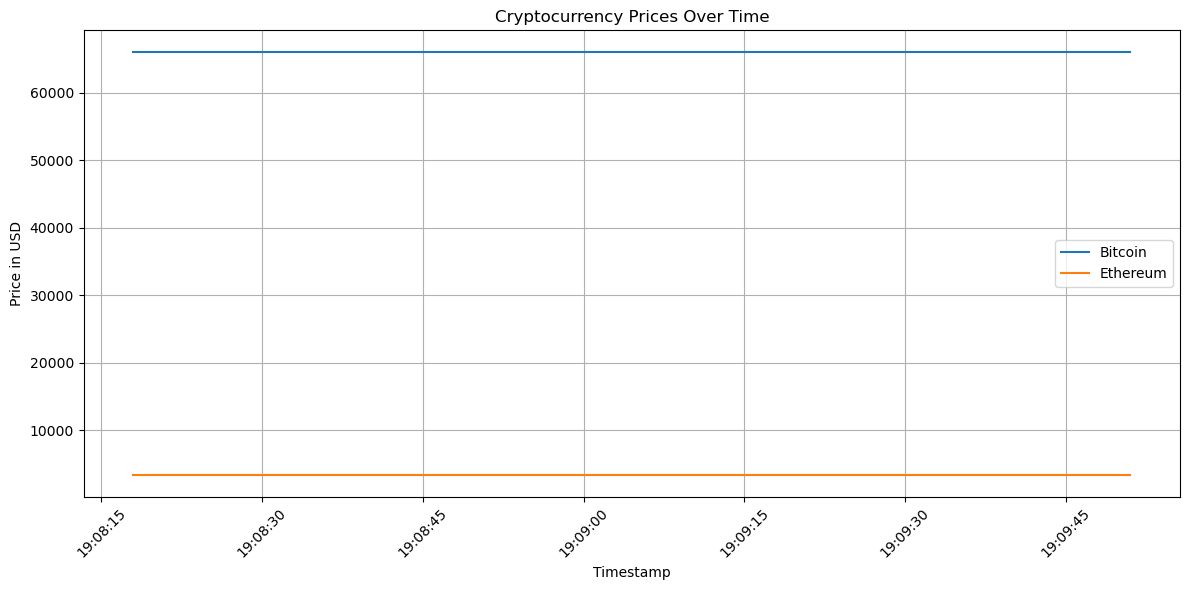

In [8]:
url = "https://api.coingecko.com/api/v3/simple/price"

coins = ['bitcoin', 'ethereum']
vs_currency = 'usd'

data = []

for _ in range(10):
    params = {
        'ids': ','.join(coins),
        'vs_currencies': vs_currency
    }
    response = requests.get(url, params=params)
    response.raise_for_status()
    prices = response.json()

    timestamp = time.strftime('%Y-%m-%d %H:%M:%S')
    row = {'timestamp': timestamp}
    for coin in coins:
        row[f'{coin}_price'] = prices[coin][vs_currency]
    data.append(row)

    time.sleep(10)

df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.figure(figsize=(12, 6))

for coin in coins:
    plt.plot(df['timestamp'], df[f'{coin}_price'], label=coin.capitalize())

plt.xlabel('Timestamp')
plt.ylabel(f'Price in {vs_currency.upper()}')
plt.title('Cryptocurrency Prices Over Time')

plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6604\1743461623.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  end_date = datetime.utcnow()  # 현재 시간


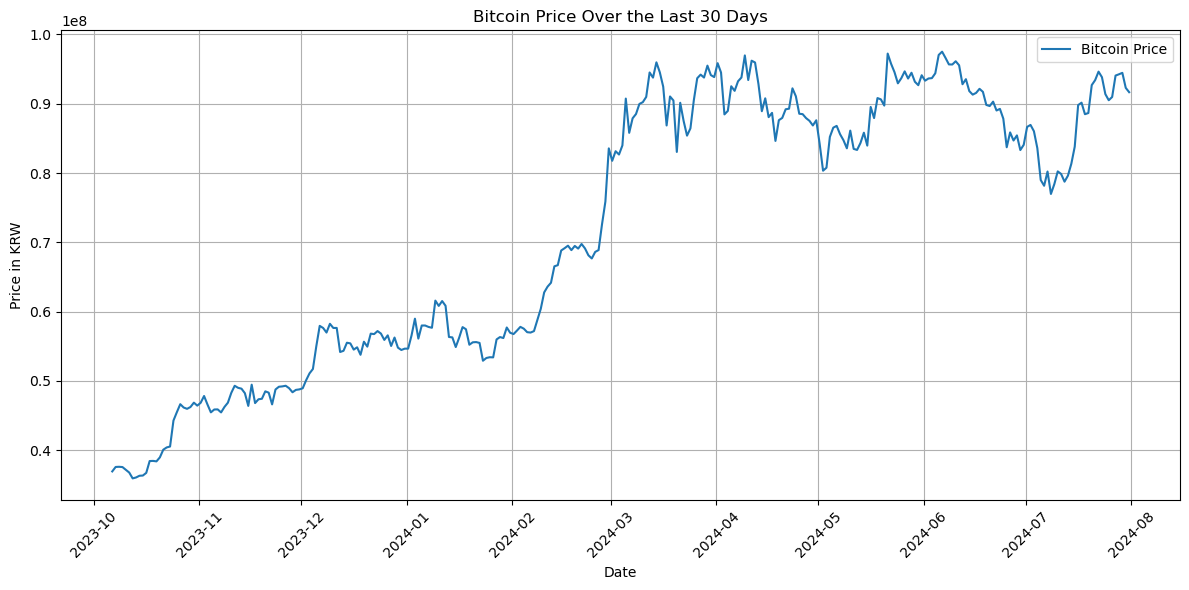

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta

# CoinGecko API 엔드포인트 URL
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"

# 과거 데이터 요청 범위 설정
end_date = datetime.utcnow()  # 현재 시간
start_date = end_date - timedelta(days=300)  # 30일 전

# Unix 타임스탬프 변환
start_timestamp = int(start_date.timestamp())
end_timestamp = int(end_date.timestamp())

# API 요청 파라미터
params = {
    'vs_currency': 'krw',
    'from': start_timestamp,
    'to': end_timestamp
}

# API 요청 보내기
response = requests.get(url, params=params)
response.raise_for_status()  # 요청 실패 시 예외 발생

# 응답 데이터 파싱
data = response.json()

# 가격 데이터 추출
prices = data['prices']
timestamps = [datetime.fromtimestamp(price[0] / 1000) for price in prices]
values = [price[1] for price in prices]

# 데이터프레임 생성
df = pd.DataFrame({
    'timestamp': timestamps,
    'price': values
})

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['price'], label='Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price in KRW')
plt.title('Bitcoin Price Over the Last 30 Days')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프를 화면에 출력
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6604\8757919.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  end_date = datetime.utcnow()


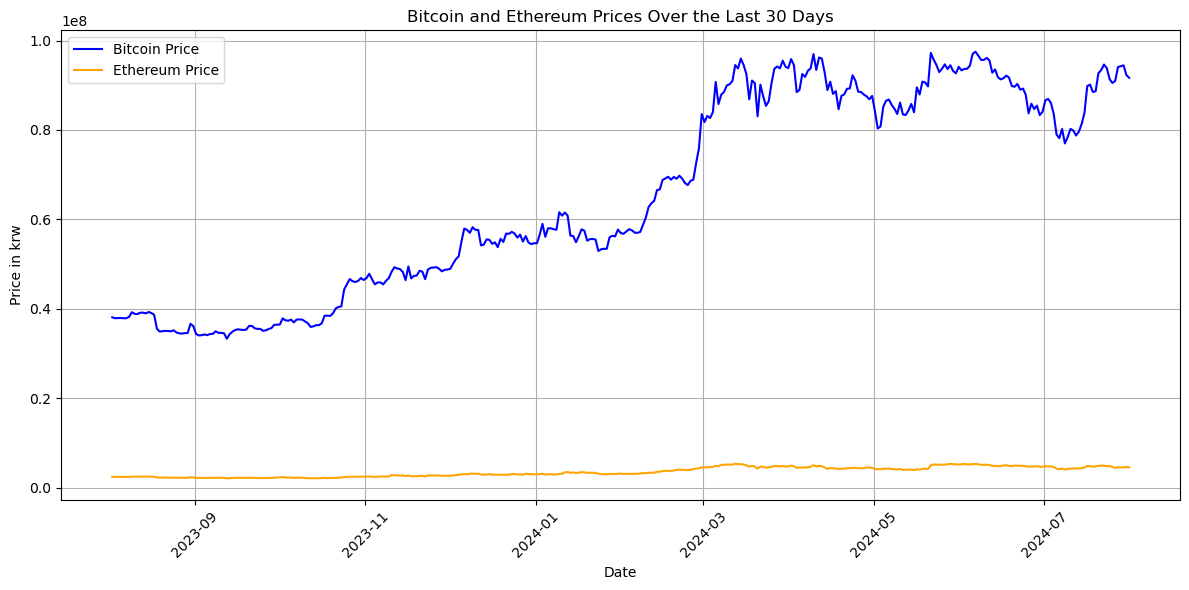

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta

# CoinGecko API 엔드포인트 URL
def get_historical_data(coin_id, start_date, end_date):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    start_timestamp = int(start_date.timestamp())
    end_timestamp = int(end_date.timestamp())
    params = {
        'vs_currency': 'krw',
        'from': start_timestamp,
        'to': end_timestamp
    }
    response = requests.get(url, params=params)
    response.raise_for_status()
    return response.json()

# 과거 데이터 요청 범위 설정
end_date = datetime.utcnow()
start_date = end_date - timedelta(days=365)

# 비트코인과 이더리움 데이터 가져오기
btc_data = get_historical_data('bitcoin', start_date, end_date)
eth_data = get_historical_data('ethereum', start_date, end_date)

# 데이터 처리 함수
def process_data(data):
    prices = data['prices']
    timestamps = [datetime.fromtimestamp(price[0] / 1000) for price in prices]
    values = [price[1] for price in prices]
    return pd.DataFrame({'timestamp': timestamps, 'price': values})

# 데이터프레임 생성
btc_df = process_data(btc_data)
eth_df = process_data(eth_data)

# 그래프 그리기
plt.figure(figsize=(12, 6))

plt.plot(btc_df['timestamp'], btc_df['price'], label='Bitcoin Price', color='blue')
plt.plot(eth_df['timestamp'], eth_df['price'], label='Ethereum Price', color='orange')

plt.xlabel('Date')
plt.ylabel('Price in krw')
plt.title('Bitcoin and Ethereum Prices Over the Last 30 Days')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [35]:
import requests

url = "https://api.coingecko.com/api/v3/simple/price"
params = {
    'ids': 'ethereum',  # 암호화폐 ID
    'vs_currencies': 'krw'  # 가격을 표시할 통화
}

response = requests.get(url, params=params)

data = response.json()

price = data['ethereum']['krw']

formatted_price = f"{price:,}"

print(f"현재 이더리움 가격은 KRW: {formatted_price}원")

현재 이더리움 가격은 KRW: 4,623,563원


In [2]:
import requests

url = "https://api.coingecko.com/api/v3/simple/price"
params = {
    'ids': 'bitcoin',  # 암호화폐 ID
    'vs_currencies': 'krw'  # 가격을 표시할 통화
}

response = requests.get(url, params=params)

data = response.json()

price = data['bitcoin']['krw']

formatted_price = f"{price:,}"

print(f"현재 bitcoin 가격은 KRW: {formatted_price}원")

현재 bitcoin 가격은 KRW: 90,959,274원


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6604\2757322789.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  end_date = datetime.utcnow()  # 현재 시간


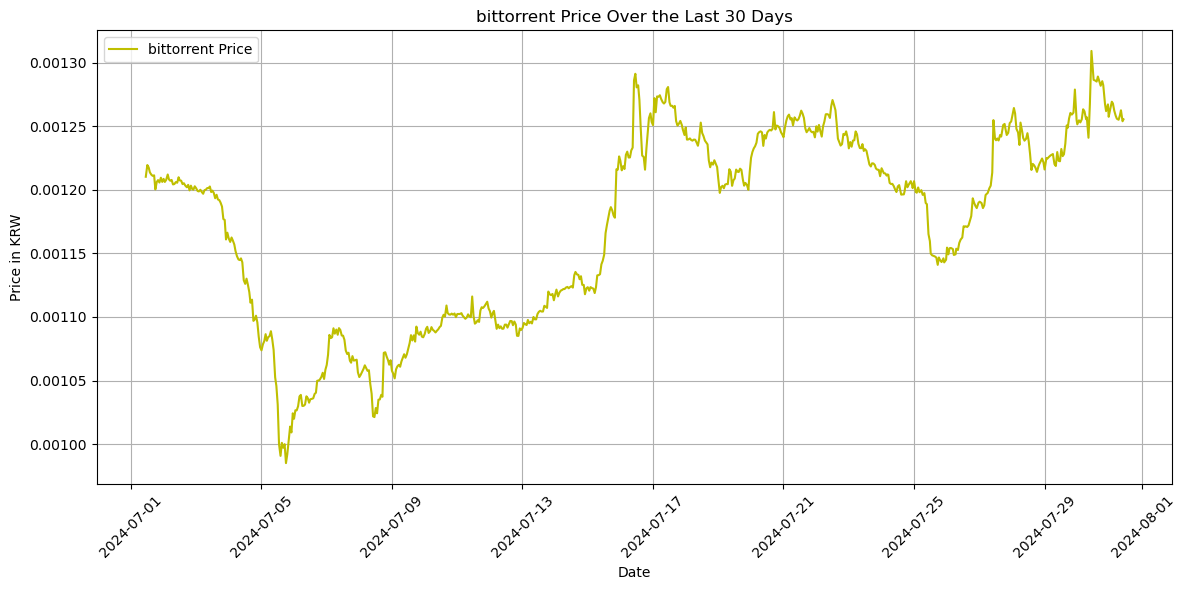

In [14]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta

# CoinGecko API 엔드포인트 URL
url = "https://api.coingecko.com/api/v3/coins/bittorrent/market_chart/range"

# 과거 데이터 요청 범위 설정
end_date = datetime.utcnow()  # 현재 시간
start_date = end_date - timedelta(days=30)  # 30일 전

# Unix 타임스탬프 변환
start_timestamp = int(start_date.timestamp())
end_timestamp = int(end_date.timestamp())

# API 요청 파라미터
params = {
    'vs_currency': 'krw',
    'from': start_timestamp,
    'to': end_timestamp
}

# API 요청 보내기
response = requests.get(url, params=params)
response.raise_for_status()  # 요청 실패 시 예외 발생

# 응답 데이터 파싱
data = response.json()

# 가격 데이터 추출
prices = data['prices']
timestamps = [datetime.fromtimestamp(price[0] / 1000) for price in prices]
values = [price[1] for price in prices]

# 데이터프레임 생성
df = pd.DataFrame({
    'timestamp': timestamps,
    'price': values
})

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['price'], label='bittorrent Price',c='y')
plt.xlabel('Date')
plt.ylabel('Price in KRW')
plt.title('bittorrent Price Over the Last 30 Days')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프를 화면에 출력
plt.show()